In [2]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [117]:
df = pd.read_csv("swbd_nocntxt.csv")

In [71]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [118]:
df = df.drop(columns="SentenceParse")

In [73]:
df.Sentence.iloc[0]

'uh, first, um, i need *-1 to know, uh, how do you feel *t*-2 about, uh, about * sending, uh, an elderly, uh, family member to a nursing home?'

In [90]:
df.groupby(["QuestionType","ModalPresent"])["QuestionType"].count()

QuestionType  ModalPresent
adjunct       no              1538
              yes              113
embadjunct    no               177
              yes               19
embedded      no              4220
              yes              403
exclamation   no                19
fragment      no                 6
              yes                1
relative      no              1202
              yes              189
root          no              1579
              yes              166
subject       no               494
              yes               73
Name: QuestionType, dtype: int64

444

In [75]:
df.pivot_table(index=['QuestionType'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df)).reset_index()

,QuestionType,Sentence
0,adjunct,0.161879
1,embadjunct,0.019218
2,embedded,0.453280
3,exclamation,0.001863
4,fragment,0.000686
5,relative,0.136386
6,root,0.171095
7,subject,0.055594


No handles with labels found to put in legend.


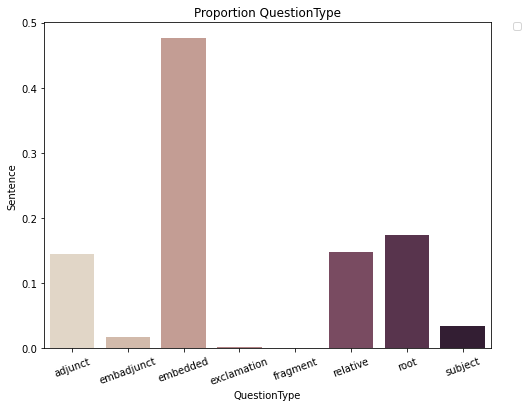

In [76]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", palette="ch:.25", data=df_pt)
g.set_title("Proportion QuestionType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

In [51]:
df_mod_pt = df.pivot_table(index=['QuestionType','ModalPresent'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df)).reset_index()

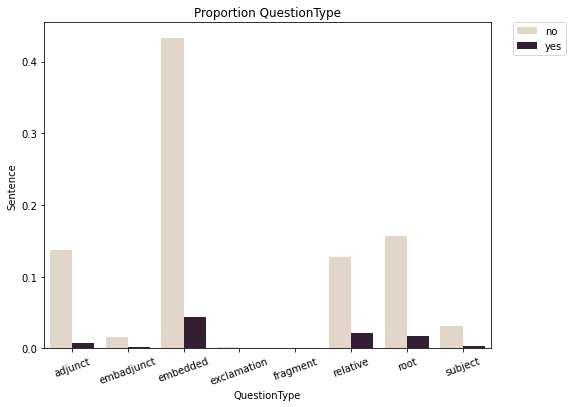

In [55]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", hue="ModalPresent", palette="ch:.25", data=df_mod_pt)
g.set_title("Proportion QuestionType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

In [119]:
df_fin_pt = df.pivot_table(index=['QuestionType','Finite'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df)).reset_index()

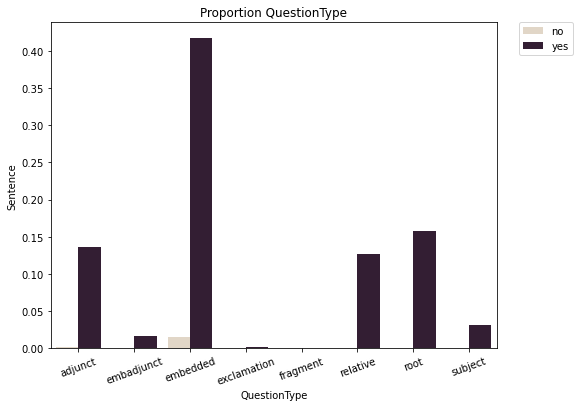

In [58]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", hue="Finite", palette="ch:.25", data=df_fin_pt)
g.set_title("Proportion QuestionType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

# Just Root and Embedded

In [122]:
df_crit = df[df.QuestionType.isin(["root","embedded"])]

In [121]:
len(df_crit)/len(df)

0.6107461515834886

## WH

In [98]:
wh_pt = df_crit.pivot_table(index=['QuestionType','Wh'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df_crit)).reset_index()

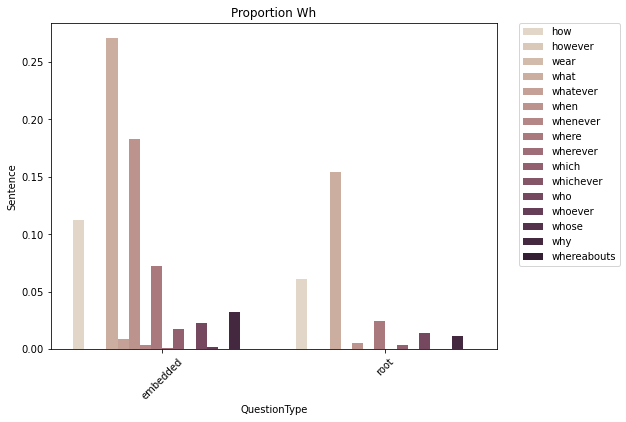

In [103]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", hue="Wh", palette="ch:.25", data=wh_pt)
g.set_title("Proportion Wh")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

exclude the 'wear' or correct the typo

In [123]:
df_wh_sub = df_crit[df_crit.Wh.isin(["who","where","how"])]

wh_sub_pt = df_wh_sub.pivot_table(index=['QuestionType','Wh'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(df_crit)).reset_index()

In [124]:
df_wh_sub.pivot_table(index=['QuestionType','Wh'], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x).reset_index()

,QuestionType,Wh,Sentence
0,embedded,how,711
1,embedded,where,505
2,embedded,who,255
3,root,how,391
4,root,where,172
5,root,who,84


In [127]:
len(df_wh_sub)

2118

In [129]:
df_wh_sub.loc[65]

index                                                                                               65
Item_ID                                                                                        1112:41
Sentence                    well, i mean, i, i wonder how people have sex *t*-1, and things like that,
HaveNeedTo                                                                                          no
Finite                                                                                             yes
ModalPresent                                                                                        no
QuestionType                                                                                  embedded
DegreeQ                                                                                             no
SubjectAuxInv                                                                                      NaN
WhAll                                                                    

In [131]:
df_root = df_wh_sub[df_wh_sub.QuestionType.isin(["root"])]

In [133]:
df_root.Sentence

11                                                                                                                                                                                                                                                          how close is it *t*-1 to a home environment.
95                                                                                                                                                                                                                                                                how do you feel *t*-1 about rap music?
184                                                                                                                                                                                                                                                             how has it been *t*-1 this week for you?
189                                                                                                          

Where are all the places....where is a place

"where do"...



In [134]:
len(df_root)

647

In [126]:
df_wh_sub.Sentence

0                                                                                                                                                                                                                                                                                                                                                    uh, first, um, i need *-1 to know, uh, how do you feel *t*-2 about, uh, about * sending, uh, an elderly, uh, family member to a nursing home?
1                                                                                                                                                                                                                                                                                                                                           and, uh, we were, i was fortunate in that i was personally acquainted with the, uh, people who, uh, *t*-1 ran the nursing home in our little hometown.
8                                 

In [136]:
# 13 but, uh, i, i, i think that, you know, we always, uh, i mean, i've, i've had a lot of good experiences with, uh, with many many people especially where they've had, uh, extended family *t*-1.

df_wh_sub.loc[13] # ID 331:188
df[df["Item_ID"] == "331:188"]

,index,Item_ID,Sentence,HaveNeedTo,Finite,ModalPresent,QuestionType,DegreeQ,SubjectAuxInv,WhAll,...,Verb3,DeterminerSubject,DeterminerNonSubject,FullWhPhrase,DeterminerSubjPresent,DeterminerNonSubjPresent,WhNode,WhParse,Question,WhPhaseType
13,13,331:188,"but, uh, i, i, i think that, you know, we always, uh, i mean, i've, i've had a lot of good experiences with, uh, with many many people especially where they've had, uh, extended family *t*-1.",no,yes,no,embedded,no,NaN,NaN,...,extended,NaN,NaN,where,no,no,NaN,(WRB where),"especially where they've had, uh, extended family *t*-1",monomorphemic


how are all the ways vs. how is a way..

which of two options..
does the speaker want to know all the ways, or a way that the person feels..
does the speaker want to know all the ways, or a way that the person deals..

13: where ---> is it adjunct???

22 :i'm not sure exactly where dances with wolves was filmed *-1 *t*-2.
where all the places vs. where a place...

"What is the speaker talking about?": all the places or 

"What does the speaker know?"


----------
think about negation and 



Notes:
1. Remove degree questions
2. Track negation (maybe save it for later)
3. identity statements: ptn with just 'BE'
4. fix the adjuncts from the emb q 


For next week:
focus on the root questions case and what EXACTLY the participants would be asked.
i.e., What is the speaker interested in? 

e.g., 
'What is a way', 
'What is some way', 
'What are all ways',
'What is the way' (for the cases where there is only one answer)
+ "other"-----fill in the blank
select the paraphrase that is most similar to the question asked
which one does the speaker have in mind



In [ ]:
# and, uh, we were, i was fortunate in that i was personally acquainted with the, uh, people who, uh, *t*-1 ran the nursing home in our little hometown.

In [ ]:
df_wh_sub.loc[1]

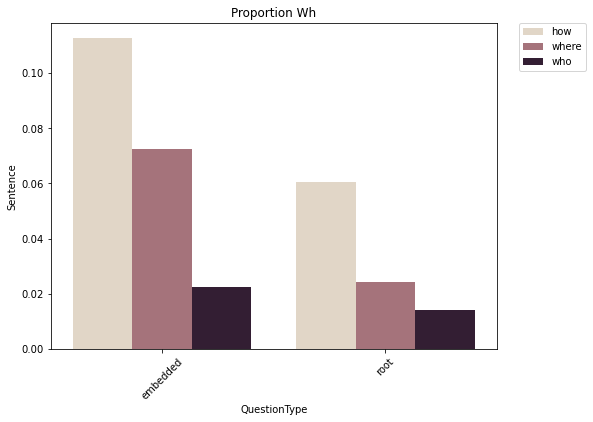

In [113]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", hue="Wh", palette="ch:.25", data=wh_sub_pt)
g.set_title("Proportion Wh")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

### Modal

In [92]:
mod = df_crit[df_crit["ModalPresent"]=="yes"]

In [97]:
mod_pt = mod.pivot_table(index=['QuestionType',"Modal"], values="Sentence", aggfunc=len).groupby(["QuestionType"]).Sentence.transform(lambda x: x/len(mod)).reset_index()

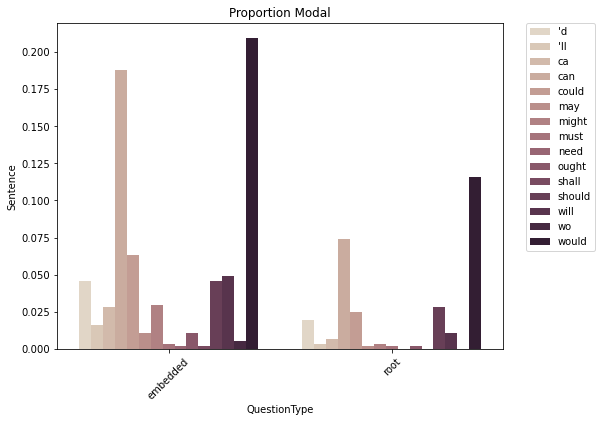

In [105]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="QuestionType",y="Sentence", hue="Modal", palette="ch:.25", data=mod_pt)
g.set_title("Proportion Modal")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()